# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:





*   GRE Scores (Test)
*   GPA Scores (Grades)
*   Class rank (1-4)


The dataset originally came from here: http://www.ats.ucla.edu/

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/uttejh/DeepLearning_PyTorch/master/student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


# **Plotting the data**

In [0]:
import matplotlib.pyplot as plt

# plot function
def plot_points(data):
  # data for 2D plot excluding Rank
  y = np.array(data["admit"])
  x = np.array(data[["gre","gpa"]])
  
  admitted = x[np.argwhere(y == 1)]
  rejected = x[np.argwhere(y == 0)]
  
  plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color = "red", edgecolor = "k")
  plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = "blue", edgecolor = "k")
  
  plt.xlabel('Test (GRE)')
  plt.ylabel('Grades (GPA)')
    
  plt.show()

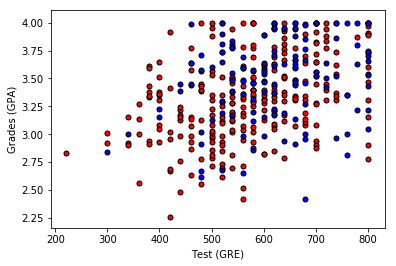

In [3]:
plot_points(data)

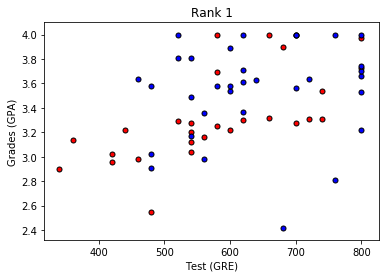

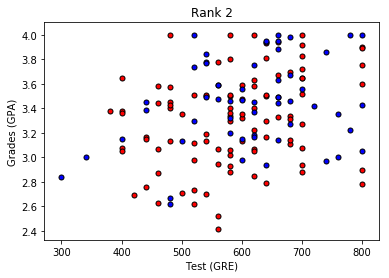

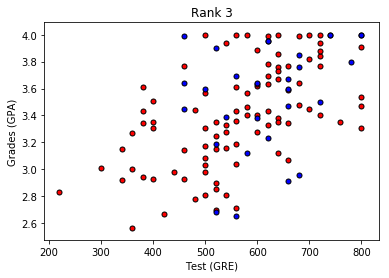

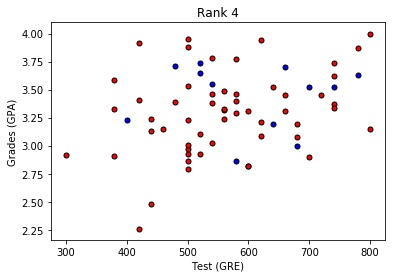

In [4]:
# plot graphs for all the ranks
data_rank1 = data[data["rank"] == 1]
data_rank2 = data[data["rank"] == 2]
data_rank3 = data[data["rank"] == 3]
data_rank4 = data[data["rank"] == 4]

plt.title("Rank 1")
plot_points(data_rank1)

plt.title("Rank 2")
plot_points(data_rank2)

plt.title("Rank 3")
plot_points(data_rank3)

plt.title("Rank 4")
plot_points(data_rank4)



# One-hot encoding

In [5]:
one_hot_data = pd.get_dummies(data=data, columns=["rank"])
one_hot_data[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


# Scaling the data

In [6]:
one_hot_data.gpa = one_hot_data.gpa/4
one_hot_data.gre = one_hot_data.gre/800
one_hot_data[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


# Training

In [12]:
# Train-test split
sample = np.random.choice(one_hot_data.index, size = int(len(one_hot_data)*0.9), replace = False)
train_data, test_data = one_hot_data.iloc[sample], one_hot_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
347      0  0.725  0.9500       0       1       0       0
55       1  0.925  1.0000       0       0       1       0
91       1  0.900  0.9100       1       0       0       0
333      0  0.700  0.8575       0       0       1       0
13       0  0.875  0.7700       0       1       0       0
124      0  0.900  0.9700       0       0       1       0
159      0  0.875  0.9550       0       0       1       0
332      0  0.525  0.7400       1       0       0       0
399      0  0.750  0.9725       0       0       1       0
87       0  0.750  0.8700       0       1       0       0
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
11       0  0.550  0.8050       1       0       0       0
12       1  0.950  1.0000       1       0       0       0
16       0  0.975  0.9675       0       0       0       1
21       1  0.825  0.9075       0       1       0       0
26    

In [13]:
# features and targets
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
347  0.725  0.9500       0       1       0       0
55   0.925  1.0000       0       0       1       0
91   0.900  0.9100       1       0       0       0
333  0.700  0.8575       0       0       1       0
13   0.875  0.7700       0       1       0       0
124  0.900  0.9700       0       0       1       0
159  0.875  0.9550       0       0       1       0
332  0.525  0.7400       1       0       0       0
399  0.750  0.9725       0       0       1       0
87   0.750  0.8700       0       1       0       0
347    0
55     1
91     1
333    0
13     0
124    0
159    0
332    0
399    0
87     0
Name: admit, dtype: int64


In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
  
# sigmoid derivative
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
  
# error
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [0]:
# Backpropagation
def error_term_formula(x, y, output):
    return (y-output)*sigmoid_prime(x)

In [16]:

epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2738686769687214
Epoch: 100
Train loss:  0.2093398084841502
Epoch: 200
Train loss:  0.20703501003860778
Epoch: 300
Train loss:  0.20586828275349386
Epoch: 400
Train loss:  0.2052541441877138
Epoch: 500
Train loss:  0.2049041381456164
Epoch: 600
Train loss:  0.2046818255221687
Epoch: 700
Train loss:  0.20452262048730907
Epoch: 800
Train loss:  0.20439550091117045
Epoch: 900
Train loss:  0.20428529816923782
Finished training!


In [17]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.650
